In [160]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

**[1].** Если у Вас не установлена библиотека Seaborn - выполните в терминале команду *conda install seaborn*. (Seaborn не входит в сборку Anaconda, но эта библиотека предоставляет удобную высокоуровневую функциональность для визуализации данных).

In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

**[2]**. Посмотрите на первые 5 записей с помощью метода *head* Pandas DataFrame. Нарисуйте гистограмму распределения веса с помощью метода *plot* Pandas DataFrame. Сделайте гистограмму зеленой, подпишите картинку.

In [162]:
data = pd.read_csv('/Users/kate/Jupyter Notebook/c2w1.csv', index_col='Index')
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


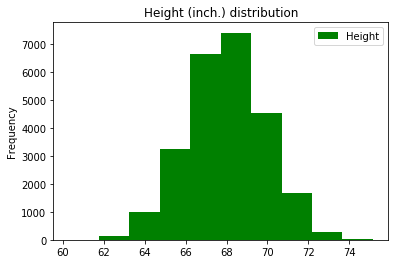

In [163]:
data.plot(y='Height', kind='hist', 
           color='green',  title='Height (inch.) distribution')

In [164]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [165]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

**[3].** Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод *pairplot* библиотеки Seaborn.

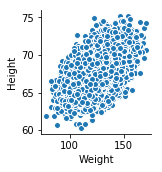

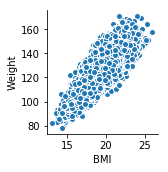

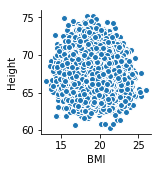

In [166]:
hw = sns.pairplot(data=data,
                  x_vars=['Weight'],
                  y_vars=['Height'])

bw = sns.pairplot(data=data,
                  x_vars=['BMI'],
                  y_vars=['Weight'])

bh = sns.pairplot(data=data,
                  x_vars=['BMI'],
                  y_vars=['Height'])

**[4]**. Создайте в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод *boxplot* библиотеки Seaborn и метод *apply* Pandas DataFrame. Подпишите ось *y* меткой «Рост», ось *x* – меткой «Весовая категория».

(непонятно в фунтах или килограммах данные, я решила, что в фунтах)

In [167]:
def weight_category(weight):
    if weight < 120:
        return 1
    if weight < 150:
        return 3
    return 2

data['Weight_cat'] = data['Weight'].apply(weight_category)

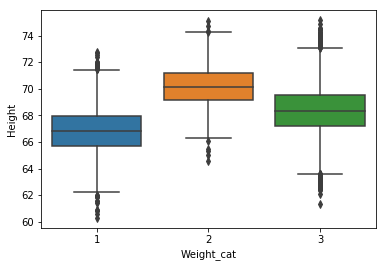

In [168]:
ax = sns.boxplot(x="Weight_cat", y="Height", data=data)

**[5].** Постройте scatter plot зависимости роста от веса, используя метод *plot* для Pandas DataFrame с аргументом *kind='scatter'*. Подпишите картинку.

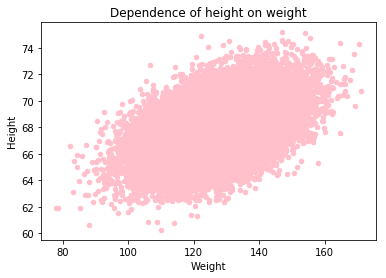

In [169]:
data.plot(y='Height', x = 'Weight', kind='scatter', 
           color='pink',  title='Dependence of height on weight')

**[6].** Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [170]:
def error(w_0, w_1, data):
    
    error = 0.0
    height = data['Height'].as_matrix()
    weight = data['Weight'].as_matrix()

    n = data.shape[0]
    
    xlist = []
    ylist = []
    
    for i in range(n):
        error += (height[i] - (w_0 + w_1*weight[i]))**2
    return error

print(error(50.0, 0.16, data))

225065.249113


**[7].** Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Используйте метод *plot* из *matplotlib.pyplot*, а также метод *linspace* библиотеки NumPy. Подпишите оси и график.

In [171]:
def y(x, w0, w1):
    return w0 + x*w1

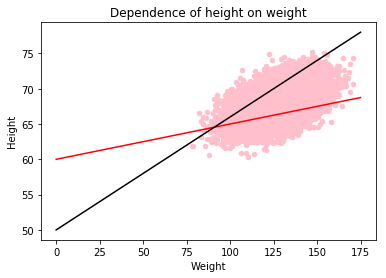

In [172]:
data.plot(y = 'Height', x = 'Weight', kind='scatter', 
           color='pink',  title='Dependence of height on weight')

x = np.linspace(0, 175)
plt.plot(x, y(x, 60.0, 0.05), color = 'red')
plt.plot(x, y(x, 50.0, 0.16), color = 'black')

**[8].** Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра $w_1$ при $w_0$ = 50. Подпишите оси и график.

Text(0,0.5,u'$Error$')

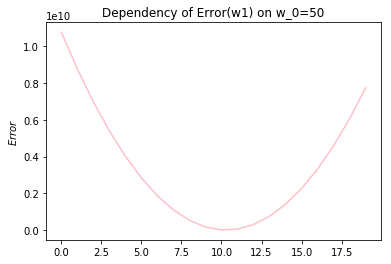

In [173]:
er = []

for w1 in np.arange(-5.0, 5.0, 0.5):
    er.append(error(50.0, w1, data))
    
plt.plot(er, color='pink')
plt.title("Dependency of Error(w1) on w_0=50")
plt.ylabel('$Error$')

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

**[9].** С помощью метода *minimize_scalar* из *scipy.optimize* найдите минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в п. 8 оптимальное значение параметра $w_1$. 

In [174]:
w_0 = 50.0
w_1_opt = minimize_scalar(lambda w_1: error(w_0, w_1, data),bounds=(-5,5))
print(w_1_opt)

     fun: 79512.217286994855
    nfev: 6
     nit: 5
 success: True
       x: 0.14109203728834385


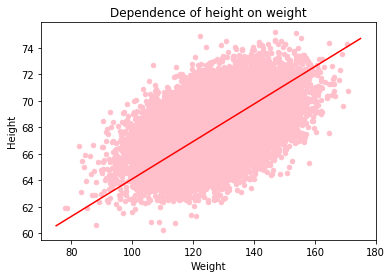

In [175]:
data.plot(y = 'Height', x = 'Weight', kind='scatter', 
           color='pink',  title='Dependence of height on weight')

x = np.linspace(75, 175)
plt.plot(x, y(x, 50.0, w_1_opt.x), color = 'red')

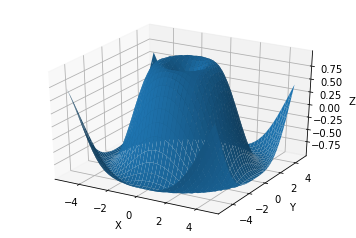

In [176]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**[10]**. Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров  w0w0  и  w1w1 . Подпишите ось  xx  меткой «Intercept», ось  yy  – меткой «Slope», a ось  zz  – меткой «Error».

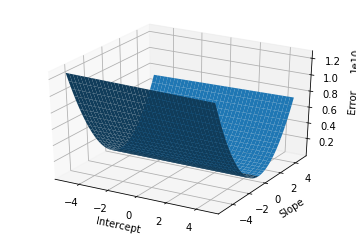

In [177]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
x, y = np.meshgrid(x, y)
z = error(x, y, data)

surf = ax.plot_surface(x, y, z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

**[11]**. С помощью метода minimize из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра  w0w0  в диапазоне [-100,100] и  w1w1  - в диапазоне [-5, 5]. Начальная точка – ( w0w0 ,  w1w1 ) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров  w0w0  и  w1w1 . Подпишите оси и график.

In [178]:
def function(params):
    return error(params[0], params[1], data)

er_min = optimize.minimize(function, [0.0, 0.0], 
                           method='L-BFGS-B', 
                           bounds=([-100, 100], [-5, 5]))
print (er_min)

      fun: 67545.287087215474
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  0.33760443,  37.66763257])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 72
      nit: 12
   status: 0
  success: True
        x: array([ 57.57178736,   0.08200645])


In [182]:
def new_y(x, w0, w1):
    return w0 + x*w1

(57.571787360785642, 0.082006449425093358)


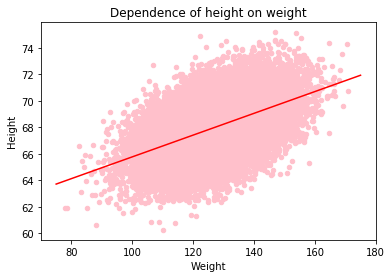

In [183]:
data.plot(y = 'Height', x = 'Weight', kind='scatter', 
           color='pink',  title='Dependence of height on weight')

x = np.linspace(75, 175)
print(er_min.x[0], er_min.x[1])
plt.plot(x, new_y(x, er_min.x[0], er_min.x[1]), color = 'red')